In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [33]:
# Read in csv
bgame_df = pd.read_csv('test_board_game_price.csv', delimiter=',')

# Display the first few rows
print(bgame_df.head())

                                Name  Min Players  Max Players  Play Time  \
0                         Gloomhaven            1            4        120   
1          Pandemic Legacy: Season 1            2            4         60   
2                  Brass: Birmingham            2            4        120   
3                  Terraforming Mars            1            5        120   
4  Twilight Imperium: Fourth Edition            3            6        480   

   Min Age  Users Rated  Rating Average  Complexity Average  Owned Users  \
0       14        42055            8.79                3.86      68323.0   
1       13        41643            8.61                2.84      65294.0   
2       14        19217            8.66                3.91      28785.0   
3       12        64864            8.43                3.24      87099.0   
4       14        13468            8.70                4.22      16831.0   

          Domain1  above_average Bayesian Average Most Notable Genre  \
0  Strat

In [34]:
len(bgame_df)

20343

In [35]:
bgame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   20343 non-null  object 
 1   Min Players            20343 non-null  int64  
 2   Max Players            20343 non-null  int64  
 3   Play Time              20343 non-null  int64  
 4   Min Age                20343 non-null  int64  
 5   Users Rated            20343 non-null  int64  
 6   Rating Average         20343 non-null  float64
 7   Complexity Average     20343 non-null  float64
 8   Owned Users            20320 non-null  float64
 9   Domain1                10184 non-null  object 
 10  above_average          20343 non-null  bool   
 11  Bayesian Average       20127 non-null  object 
 12  Most Notable Genre     20127 non-null  object 
 13  Most Notable Mechanic  20127 non-null  object 
 14  Price                  20127 non-null  object 
dtypes:

In [36]:
bgame_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   20343 non-null  object 
 1   Min Players            20343 non-null  int64  
 2   Max Players            20343 non-null  int64  
 3   Play Time              20343 non-null  int64  
 4   Min Age                20343 non-null  int64  
 5   Users Rated            20343 non-null  int64  
 6   Rating Average         20343 non-null  float64
 7   Complexity Average     20343 non-null  float64
 8   Owned Users            20320 non-null  float64
 9   Domain1                10184 non-null  object 
 10  above_average          20343 non-null  bool   
 11  Bayesian Average       20127 non-null  object 
 12  Most Notable Genre     20127 non-null  object 
 13  Most Notable Mechanic  20127 non-null  object 
 14  Price                  20127 non-null  object 
dtypes:

In [37]:
unique_domain = bgame_df['Domain1'].unique()
print(unique_domain)

['Strategy Games' 'Thematic Games' 'Family Games' 'Customizable Games'
 'Abstract Games' 'Party Games' 'Wargames' "Children's Games" nan]


In [38]:
unique_genre = bgame_df['Most Notable Genre'].unique()
print(unique_genre)

['Adventure' 'Environmental' 'Age of Reason' 'Economic' 'Civilization'
 'Card Game' 'Civil War' 'Modern Warfare' 'American West' 'Fantasy' 'Dice'
 'Ancient' 'Animals' 'Medieval' 'City Building' 'Abstract Strategy'
 'Bluffing' 'Action / Dexterity' 'Arabian' 'Industry / Manufacturing'
 'Renaissance' 'Deduction' 'Medical' 'Science Fiction' 'Aviation / Flight'
 'Exploration' 'Trains' 'Post-Napoleonic' 'Miniatures' 'Wargame'
 'Party Game' 'Movies / TV / Radio theme' 'Horror' 'Real-time' 'Racing'
 nan 'Humor' 'Maze' 'Spies/Secret Agents' 'Collectible Components'
 'Nautical' 'Fighting' 'Prehistoric' 'Educational' 'Math' 'Travel'
 'Mythology' 'Negotiation' 'Political' "Children's Game" 'Napoleonic'
 'Farming' 'Transportation' 'Territory Building' 'American Civil War'
 'Parsing Error' 'American Indian Wars' 'Comic Book / Strip' 'Mafia'
 'Electronic' 'Not available' 'Puzzle' 'Murder/Mystery' 'Novel-based'
 'Sports' 'Korean War' 'Print & Play' 'Book' 'American Revolutionary War'
 'Religious' 'Vid

In [39]:
# Group by 'Domain1' and aggregate 'Most Notable Genre'
grouped_genres = bgame_df.groupby('Domain1')['Most Notable Genre'].unique()

# Create a DataFrame from the grouped genres
grouped_genres_df = grouped_genres.reset_index()

# Add a new column 'Total Genres' which is length of each unique genre list
grouped_genres_df['Total Genres'] = grouped_genres_df['Most Notable Genre'].apply(len)

# Print the result
grouped_genres_df

,Domain1,Most Notable Genre,Total Genres
0,Abstract Games,"[Abstract Strategy, Dice, nan, Card Game, Puzz...",33
1,Children's Games,"[Children's Game, Action / Dexterity, Adventur...",24
2,Customizable Games,"[Adventure, Card Game, Bluffing, Aviation / Fl...",16
3,Family Games,"[Animals, Card Game, Ancient, Adventure, Medie...",69
4,Party Games,"[Card Game, Deduction, Bluffing, Party Game, n...",36
5,Strategy Games,"[Adventure, Environmental, Age of Reason, Econ...",66
6,Thematic Games,"[Civil War, Fantasy, Adventure, Bluffing, Dedu...",53
7,Wargames,"[Miniatures, Ancient, Wargame, Civil War, nan,...",54


In [40]:
unique_mechanic = bgame_df['Most Notable Mechanic'].unique()
print(unique_mechanic)

['Action Queue' 'Action Points' 'Hand Management' 'Closed Drafting'
 'Action Drafting' 'End Game Bonuses' 'Area Majority / Influence'
 'Action/Event' 'Deck, Bag, and Pool Building' 'Action Retrieval'
 'Dice Rolling' 'Automatic Resource Growth' 'Contracts'
 'Campaign / Battle Card Driven' 'Card Play Conflict Resolution'
 'Delayed Purchase' 'Area Movement' 'Cooperative Game'
 'Auction: Turn Order Until Pass' 'Bias' 'Communication Limits'
 'Commodity Speculation' 'Follow' 'Catch the Leader' 'Flicking'
 'Auction/Bidding' 'Chit-Pull System' 'Auction: Fixed Placement'
 'Enclosure' 'Grid Coverage' 'Bingo' 'Connections' 'Finale Ending'
 'Advantage Token' 'Alliances' 'Increase Value of Unchosen Resources'
 'Auction: Dutch' 'Events' 'Betting and Bluffing' 'Grid Movement'
 'Auction: Once Around' 'Hidden Roles' nan 'Acting' 'Investment'
 'Open Drafting' 'Pattern Recognition' 'Hexagon Grid' 'Order Counters'
 'Critical Hits and Failures' 'Race' 'Deduction' 'Chaining'
 'Point to Point Movement' 'Pick

In [41]:
# Group by 'Domain1' and aggregate 'Most Notable Genre'
grouped_mechanics = bgame_df.groupby('Domain1')['Most Notable Mechanic'].unique()

# Convert to DataFrame
grouped_mechanics_df = grouped_mechanics.reset_index()

# Add a new column 'Total Mechanics' which is length of each unique genre list
grouped_mechanics_df['Total Mechanics'] = grouped_mechanics_df['Most Notable Mechanic'].apply(len)


# Print the result
grouped_mechanics_df

,Domain1,Most Notable Mechanic,Total Mechanics
0,Abstract Games,"[End Game Bonuses, Grid Coverage, Contracts, G...",70
1,Children's Games,"[Area Movement, Dice Rolling, Hand Management,...",60
2,Customizable Games,"[Action Points, Card Play Conflict Resolution,...",33
3,Family Games,"[Action Queue, Contracts, Communication Limits...",110
4,Party Games,"[Communication Limits, Finale Ending, Grid Mov...",65
5,Strategy Games,"[Action Queue, Action Points, Hand Management,...",101
6,Thematic Games,"[Area Majority / Influence, Action Drafting, C...",53
7,Wargames,"[Area Majority / Influence, Campaign / Battle ...",47


In [42]:
domain_stats = bgame_df.groupby('Domain1').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Rating Average', ascending=False)

# Display the result
print(domain_stats)

                    Rating Average  Owned Users  Users Rated
Domain1                                                     
Strategy Games            7.028981    7742493.0      5414953
Wargames                  6.852060    1723997.0       658317
Thematic Games            6.839453    3174966.0      1811793
Family Games              6.424877    8060172.0      5123129
Customizable Games        6.370102     664351.0       383624
Party Games               6.309691    1925037.0      1131753
Abstract Games            6.230140    1445470.0       934403
Children's Games          5.516485     596811.0       324477


In [43]:
domain_stats = bgame_df.groupby('Domain1').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Owned Users', ascending=False)

# Display the result
print(domain_stats)

                    Rating Average  Owned Users  Users Rated
Domain1                                                     
Family Games              6.424877    8060172.0      5123129
Strategy Games            7.028981    7742493.0      5414953
Thematic Games            6.839453    3174966.0      1811793
Party Games               6.309691    1925037.0      1131753
Wargames                  6.852060    1723997.0       658317
Abstract Games            6.230140    1445470.0       934403
Customizable Games        6.370102     664351.0       383624
Children's Games          5.516485     596811.0       324477


In [44]:
genre_stats = bgame_df.groupby('Most Notable Genre').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Rating Average', ascending=False)

# Display the result
print(genre_stats)

                            Rating Average  Owned Users  Users Rated
Most Notable Genre                                                  
Expansion for Base-game           7.461111       3111.0          562
Book                              7.417609      31702.0        11455
American Revolutionary War        7.157500       5549.0         2021
Miniatures                        7.151044     151635.0        76863
Napoleonic                        7.066940      99962.0        37815
...                                    ...          ...          ...
Movies / TV / Radio theme         5.715728     137968.0        58819
Zombies                           5.652000       4462.0         1872
Children's Game                   5.577347     390353.0       200168
Mature / Adult                    5.451000       9235.0         3656
Trivia                            5.413548      15977.0         6346

[83 rows x 3 columns]


In [45]:
genre_stats = bgame_df.groupby('Most Notable Genre').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Owned Users', ascending=False)

# Display the result
print(genre_stats)

                         Rating Average  Owned Users  Users Rated
Most Notable Genre                                               
Card Game                      6.278984    5446143.0      2967921
Adventure                      6.576283    2278093.0      1268603
Bluffing                       6.396244    1583336.0       969695
Abstract Strategy              6.303437    1579412.0       985369
Economic                       6.465459    1501124.0      1042389
...                                 ...          ...          ...
Zombies                        5.652000       4462.0         1872
Space Exploration              6.860000       3813.0         1800
Religious                      5.748889       3800.0         2231
Expansion for Base-game        7.461111       3111.0          562
World War II                   6.517500        987.0          618

[83 rows x 3 columns]


In [46]:
mech_stats = bgame_df.groupby('Most Notable Mechanic').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Rating Average', ascending=False)

# Display the result
print(mech_stats)

                           Rating Average  Owned Users  Users Rated
Most Notable Mechanic                                              
Die Icon Resolution              7.723333        859.0          261
Automatic Resource Growth        7.647778     185282.0       147620
Finale Ending                    7.580000      38202.0        27134
Auction: Fixed Placement         7.540000      27843.0        21314
Measurement Movement             7.496667       1072.0          444
...                                   ...          ...          ...
Single Loser Game                5.323333       3042.0         1880
Passed Action Token              5.290000        275.0          132
Roll / Spin and Move             5.226841     207994.0        95089
Questions and Answers            5.100000       1509.0          455
Auction: English                 4.680000      41300.0        29277

[160 rows x 3 columns]


In [47]:
mech_stats = bgame_df.groupby('Most Notable Mechanic').agg({
    'Rating Average': 'mean', 
    'Owned Users': 'sum',
    'Users Rated': 'sum'
}).sort_values(by='Owned Users', ascending=False)

# Display the result
print(mech_stats)

                                          Rating Average  Owned Users  \
Most Notable Mechanic                                                   
Dice Rolling                                    6.459435    2977269.0   
Hand Management                                 6.246337    2778378.0   
Area Majority / Influence                       6.771213    2334909.0   
Action Points                                   6.945185    2213262.0   
Cooperative Game                                6.745269    1327276.0   
...                                                  ...          ...   
Worker Placement, Different Worker Types        6.540000        255.0   
Force Commitment                                5.990000        185.0   
Relative Movement                               5.380000        134.0   
Kill Steal                                      7.410000        127.0   
Resource to Move                                6.570000        127.0   

                                          Users Ra

In [48]:
def find_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Return outliers
    return group[(group < lower_bound) | (group > upper_bound)]

# Apply this function to each domain for both 'Rating Average' and 'Owned Users'
outliers_rating_avg = bgame_df.groupby('Domain1')['Rating Average'].apply(find_outliers)
outliers_owned_users = bgame_df.groupby('Domain1')['Owned Users'].apply(find_outliers)

# Calculate the number of outliers per domain
outliers_count_rating_avg = outliers_rating_avg.groupby('Domain1').count()
outliers_count_owned_users = outliers_owned_users.groupby('Domain1').count()

# Display the number of outliers per domain
print("Outliers in Rating Average per Domain:")
print(outliers_count_rating_avg)

print("\nOutliers in Owned Users per Domain:")
print(outliers_count_owned_users )


Outliers in Rating Average per Domain:
Domain1
Abstract Games        18
Children's Games       6
Customizable Games     6
Family Games          30
Party Games            8
Strategy Games        19
Thematic Games         4
Wargames              16
Name: Rating Average, dtype: int64

Outliers in Owned Users per Domain:
Domain1
Abstract Games        148
Children's Games       98
Customizable Games     38
Family Games          230
Party Games            51
Strategy Games        191
Thematic Games         92
Wargames              283
Name: Owned Users, dtype: int64


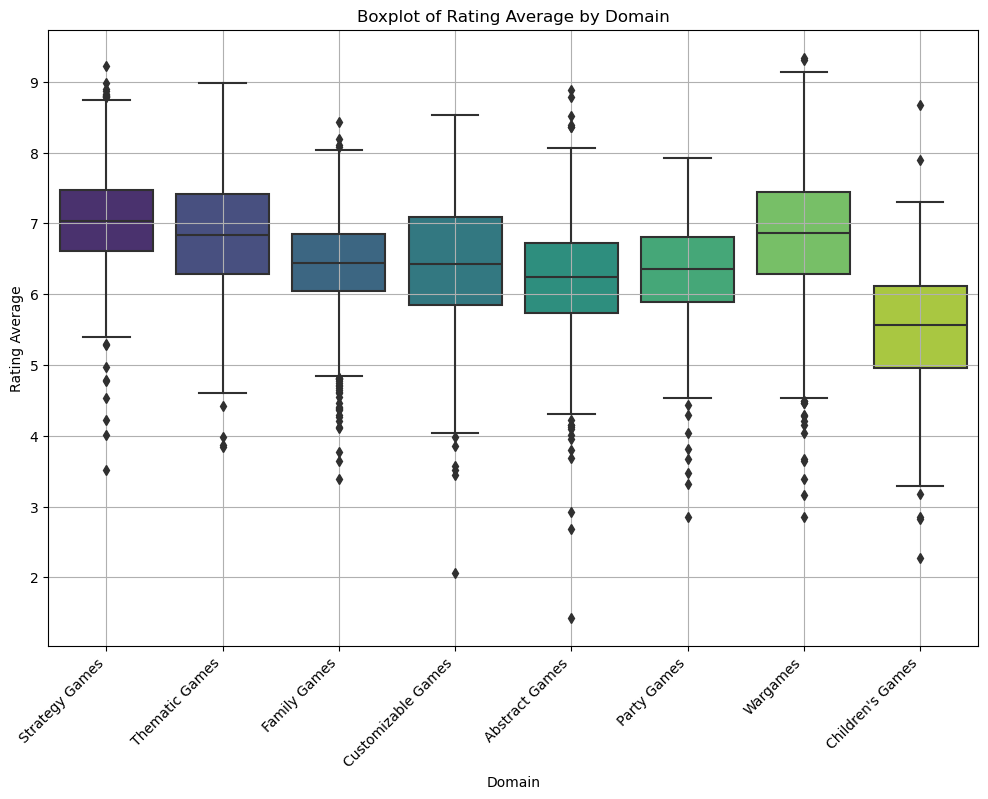

In [49]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Domain1', y='Rating Average', data=bgame_df, palette='viridis')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding title and labels
plt.title('Boxplot of Rating Average by Domain')
plt.xlabel('Domain')
plt.ylabel('Rating Average')
plt.grid(True)
plt.show()


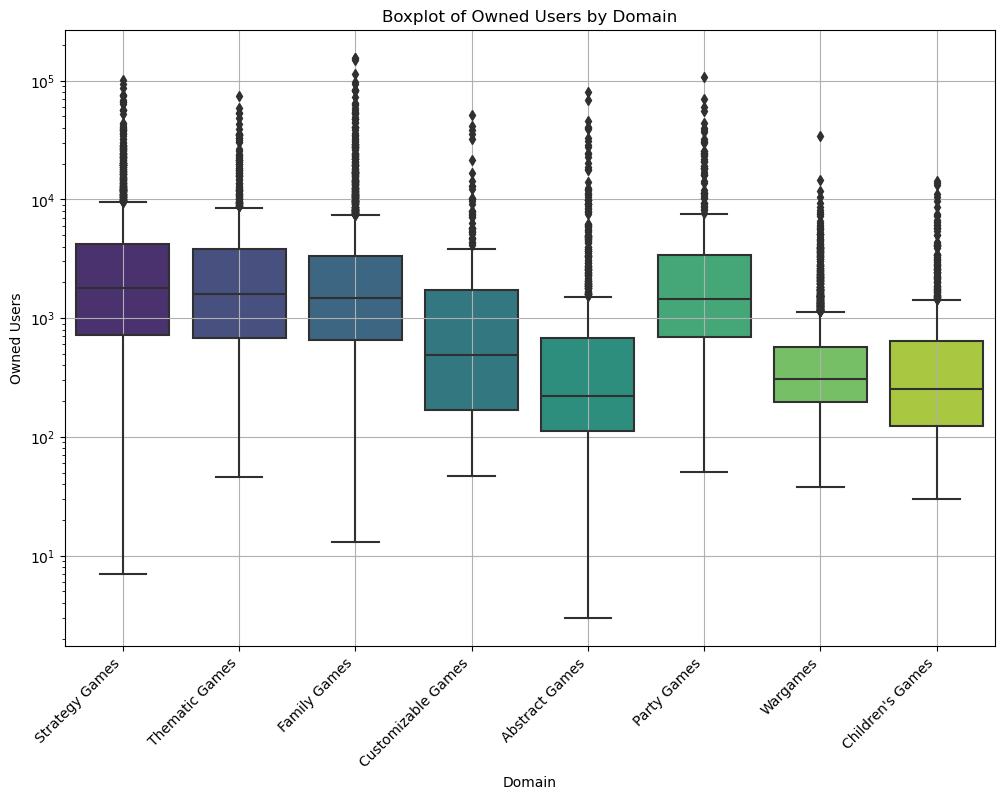

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Domain1', y='Owned Users', data=bgame_df, palette='viridis')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Boxplot of Owned Users by Domain')
plt.xlabel('Domain')
plt.ylabel('Owned Users')
plt.yscale('log')  # Use log scale if 'Owned Users' has a large range

plt.grid(True)
plt.show()

In [51]:
correlation = bgame_df['Rating Average'].corr(bgame_df['Owned Users'])
print(f"Correlation coefficient between Rating Average and Owned Users: {correlation}")


Correlation coefficient between Rating Average and Owned Users: 0.177269073844641


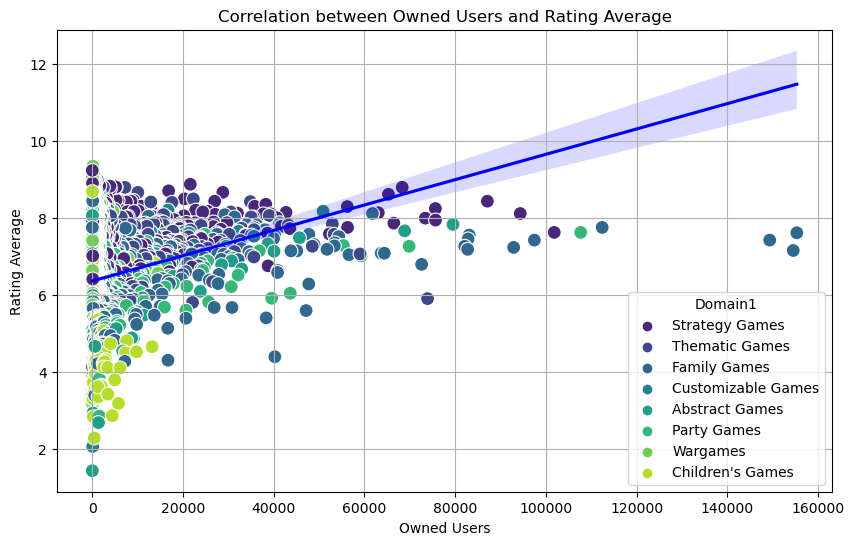

In [52]:
# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Owned Users', y='Rating Average', data=bgame_df, hue='Domain1', palette='viridis', s=100)

# Trend line (linear regression line)
sns.regplot(x='Owned Users', y='Rating Average', data=bgame_df, scatter=False, color='blue')

# Adding labels and title
plt.title('Correlation between Owned Users and Rating Average')
plt.xlabel('Owned Users')
plt.ylabel('Rating Average')
plt.grid(True)
plt.show()


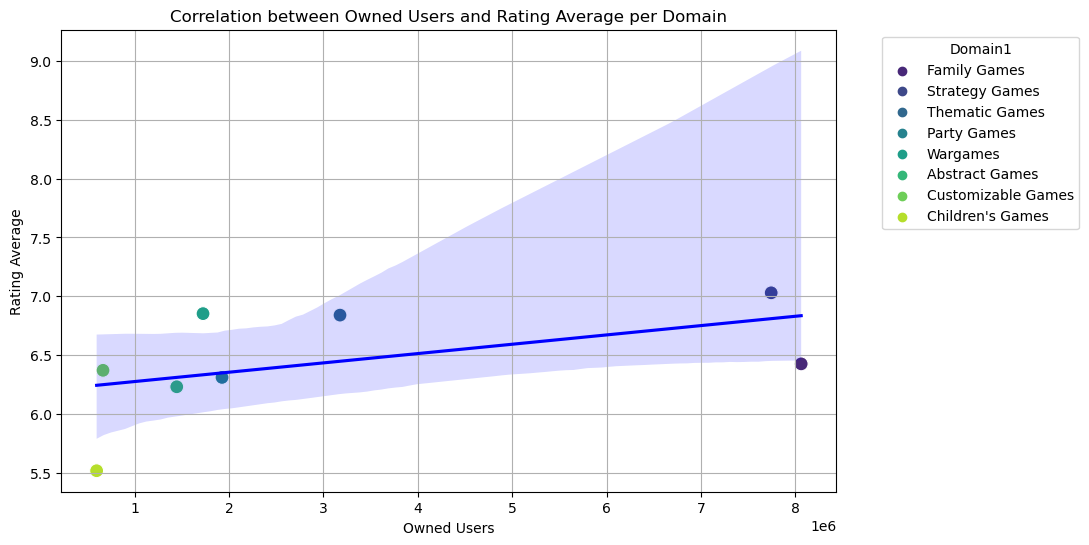

In [53]:
# Scatter plot to visualize the correlation between 'Owned Users' and 'Rating Average'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=domain_stats, x='Owned Users', y='Rating Average', hue='Domain1', palette='viridis', s=100)

# Trend line to the scatter plot
sns.regplot(data=domain_stats, x='Owned Users', y='Rating Average', scatter=False, color='blue')

# Adding labels and title
plt.title('Correlation between Owned Users and Rating Average per Domain')
plt.xlabel('Owned Users')
plt.ylabel('Rating Average')
plt.legend(title='Domain1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

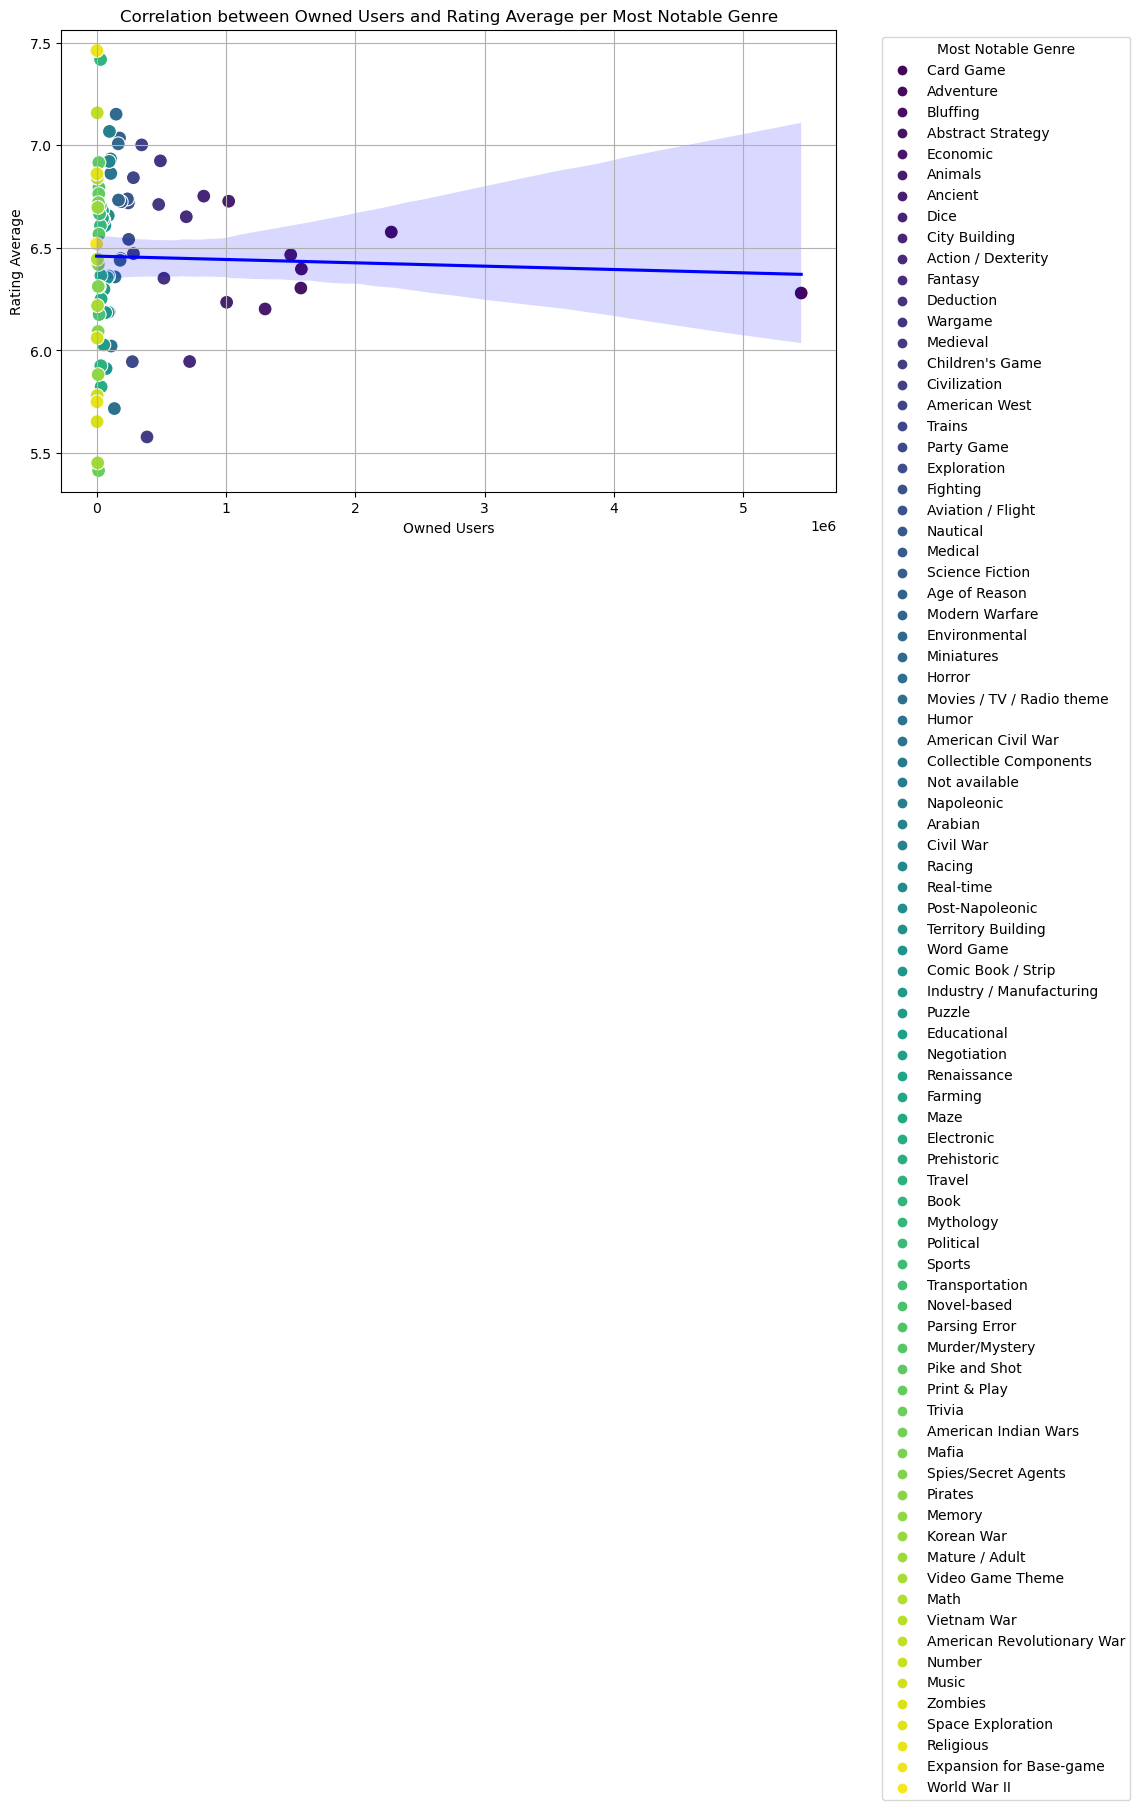

In [54]:
# Scatter plot to visualize the correlation between 'Owned Users' and 'Rating Average'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=genre_stats, x='Owned Users', y='Rating Average', hue='Most Notable Genre', palette='viridis', s=100)

# Trend line to the scatter plot
sns.regplot(data=genre_stats, x='Owned Users', y='Rating Average', scatter=False, color='blue')

# Adding labels and title
plt.title('Correlation between Owned Users and Rating Average per Most Notable Genre')
plt.xlabel('Owned Users')
plt.ylabel('Rating Average')
plt.legend(title='Most Notable Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

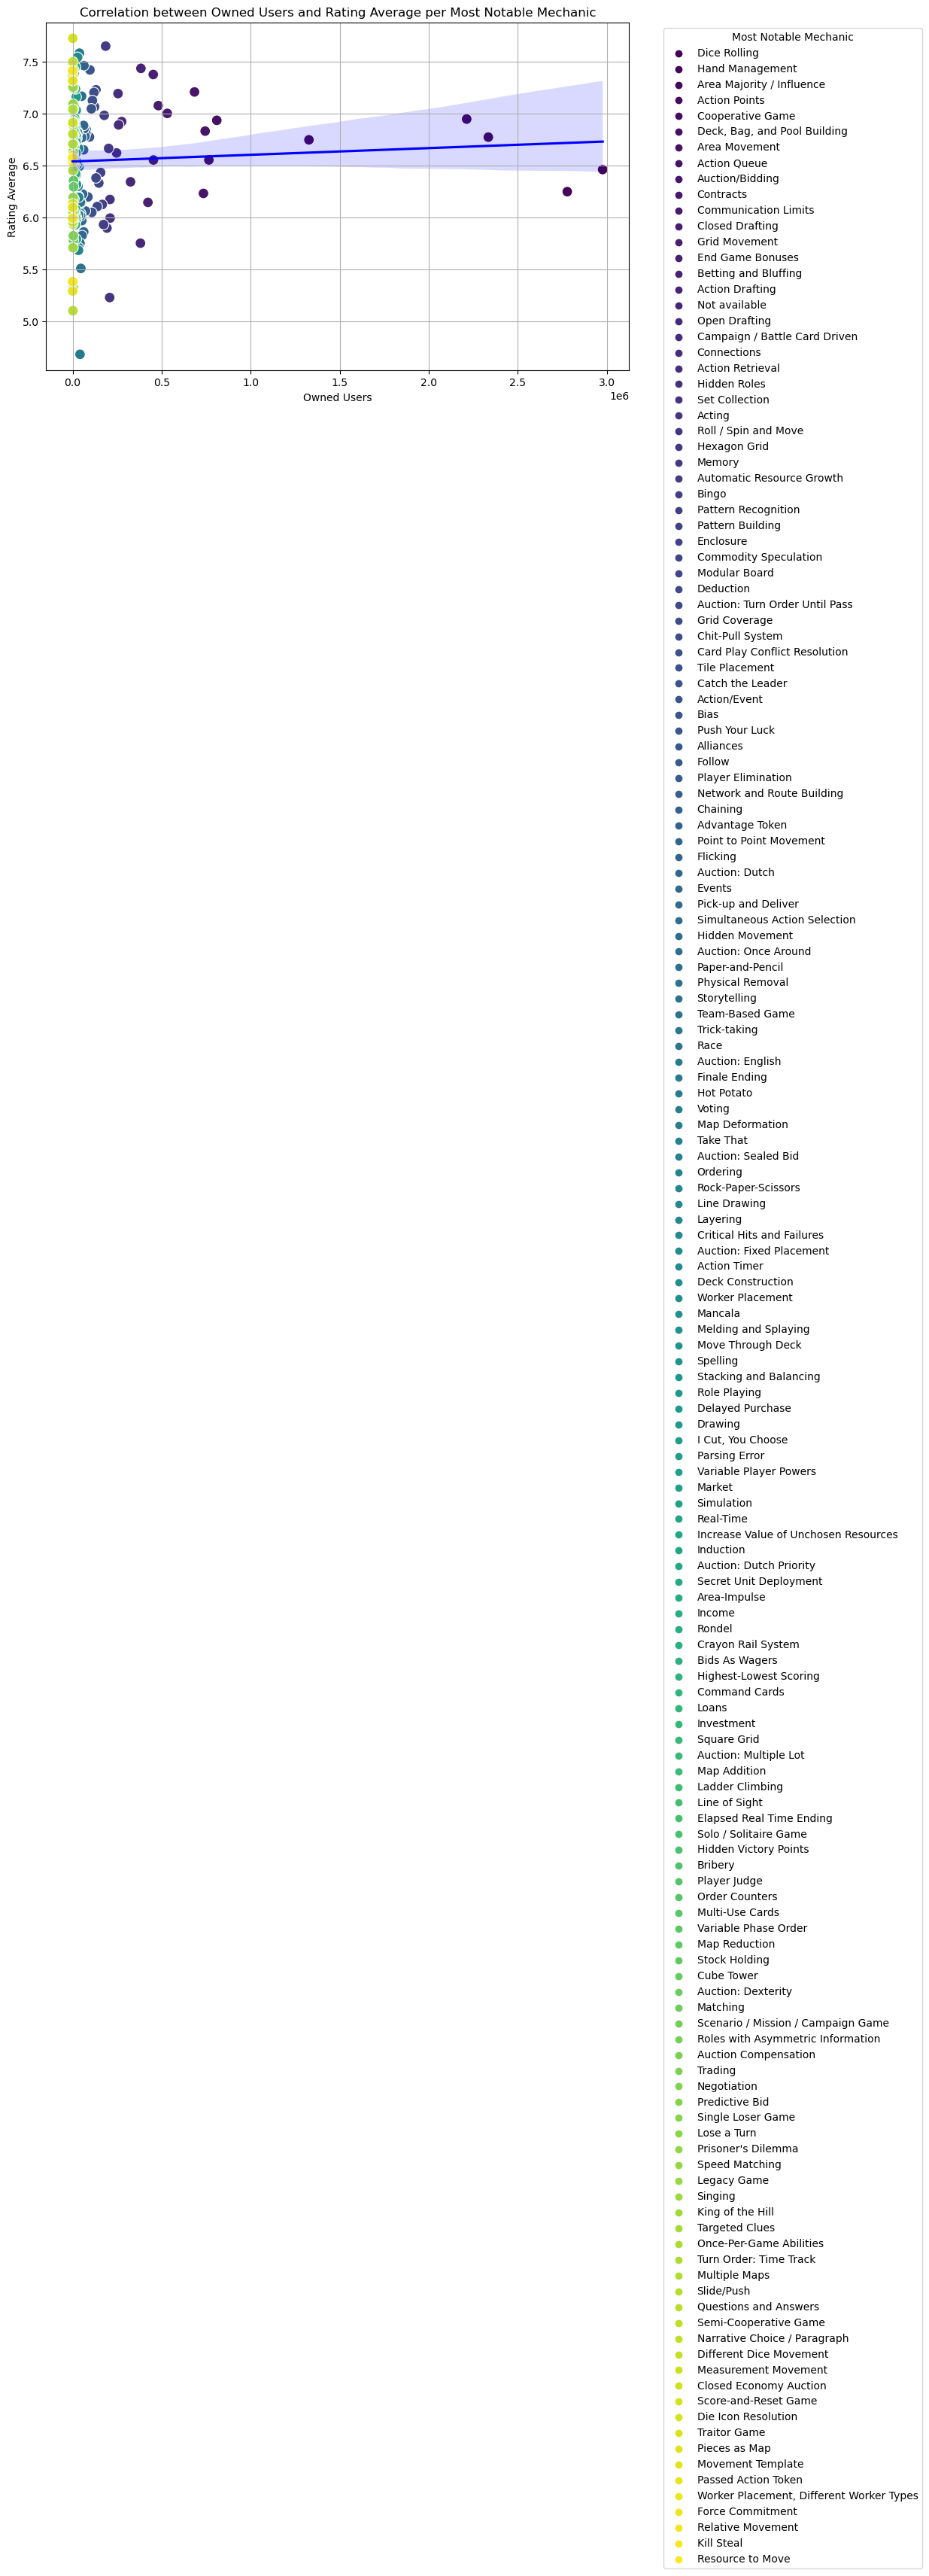

In [55]:
# Scatter plot to visualize the correlation between 'Owned Users' and 'Rating Average'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mech_stats, x='Owned Users', y='Rating Average', hue='Most Notable Mechanic', palette='viridis', s=100)

# Trend line to the scatter plot
sns.regplot(data=mech_stats, x='Owned Users', y='Rating Average', scatter=False, color='blue')

# Adding labels and title
plt.title('Correlation between Owned Users and Rating Average per Most Notable Mechanic')
plt.xlabel('Owned Users')
plt.ylabel('Rating Average')
plt.legend(title='Most Notable Mechanic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()